PyTorch-Based Credit Card Fraud Detection: 

A Report Overview:

Financial companies need to detect credit card theft in order to reduce losses and safeguard their clients. This research investigates the use of PyTorch to construct a neural network model for this purpose. The main ideas and implementation procedures are described, even though the precise code cannot be disclosed owing to secrecy.



#Import Required Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

Techniques:

Data Loading and Preprocessing: A placeholder is used to substitute the dataset path in order to load and preprocess a dataset on credit card fraud.
Outliers and missing values are treated properly.
Scaling numerical characteristics improves training.

Model Design: PyTorch's nn.Module is used to define a neural network design.
The task (binary classification) determines the selection of hyperparameters, including the output layer, activation function, and hidden layer size.

Loss Function and Optimizer: For multi-class classification, binary cross-entropy loss is employed.
Adam optimizer is selected due to its effectiveness and strong performance across a range of jobs.

Both forward and backpropagation are used. Manually computing outputs at each layer is how forward propagation is carried out.
During training, weights are updated and gradients are computed using backpropagation.

Training and Evaluation: Three sets of data are created from the data: test, validation, and training.
The model is trained on the training set and its performance is observed on the validation set to prevent overfitting.
Ultimately, criteria including the F1-score, recall, accuracy, and precision are used to assess the test set.

Visualization and Interpretation: To examine acquired features and acquire understanding of the model's decision-making, methods such as LIME or SHAP are taken into consideration.


In [17]:
# Load the dataset
data = pd.read_csv("credit_card_fraud.csv")

In [18]:
# after the data has been entered into the system, verify it.
print(data.head())

  Transaction Date and Time  Transaction Amount        Cardholder Name  \
0       2022-09-24 13:54:27              285.88            Shray Soman   
1       2020-07-24 11:20:13             1777.32         Lakshit Bakshi   
2       2023-03-18 01:05:36             3939.01             Riya Bobal   
3       2021-01-07 21:53:04              376.44  Mohanlal Balakrishnan   
4       2021-12-16 06:22:24             1687.33            Mannat Rout   

                   Card Number (Hashed or Encrypted)  \
0  daca51bffe0fc4eaaa7c430917f94b75fd893712492254...   
1  d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...   
2  4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...   
3  4721806eed8f2663bb597ff13e79a294de318358fbb54b...   
4  9deacc3a9efd6e382826d400620aca5f23ed94327578e5...   

                 Merchant Name  Merchant Category Code (MCC)  \
0  Rajagopalan, Ghose and Kant                          3590   
1                     Sule PLC                          7277   
2                    Badal

In [19]:
#check the data frame format
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Transaction Date and Time                8000 non-null   object 
 1   Transaction Amount                       8000 non-null   float64
 2   Cardholder Name                          8000 non-null   object 
 3   Card Number (Hashed or Encrypted)        8000 non-null   object 
 4   Merchant Name                            8000 non-null   object 
 5   Merchant Category Code (MCC)             8000 non-null   int64  
 6   Transaction Location (City or ZIP Code)  8000 non-null   object 
 7   Transaction Currency                     8000 non-null   object 
 8   Card Type                                8000 non-null   object 
 9   Card Expiration Date                     8000 non-null   object 
 10  CVV Code (Hashed or Encrypted)           8000 no

In [20]:
print(data.isnull().sum())

Transaction Date and Time                     0
Transaction Amount                            0
Cardholder Name                               0
Card Number (Hashed or Encrypted)             0
Merchant Name                                 0
Merchant Category Code (MCC)                  0
Transaction Location (City or ZIP Code)       0
Transaction Currency                          0
Card Type                                     0
Card Expiration Date                          0
CVV Code (Hashed or Encrypted)                0
Transaction Response Code                     0
Transaction ID                                0
Fraud Flag or Label                           0
Previous Transactions                      2043
Transaction Source                            0
IP Address                                    0
Device Information                            0
User Account Information                   4010
Transaction Notes                             0
dtype: int64


In [21]:
# print the columns of the data that has been enterd. so the non required data can be removed
print(data.columns)

Index(['Transaction Date and Time', 'Transaction Amount', 'Cardholder Name',
       'Card Number (Hashed or Encrypted)', 'Merchant Name',
       'Merchant Category Code (MCC)',
       'Transaction Location (City or ZIP Code)', 'Transaction Currency',
       'Card Type', 'Card Expiration Date', 'CVV Code (Hashed or Encrypted)',
       'Transaction Response Code', 'Transaction ID', 'Fraud Flag or Label',
       'Previous Transactions', 'Transaction Source', 'IP Address',
       'Device Information', 'User Account Information', 'Transaction Notes'],
      dtype='object')


In [22]:
print(data['Fraud Flag or Label'].value_counts())

Fraud Flag or Label
0    4011
1    3989
Name: count, dtype: int64


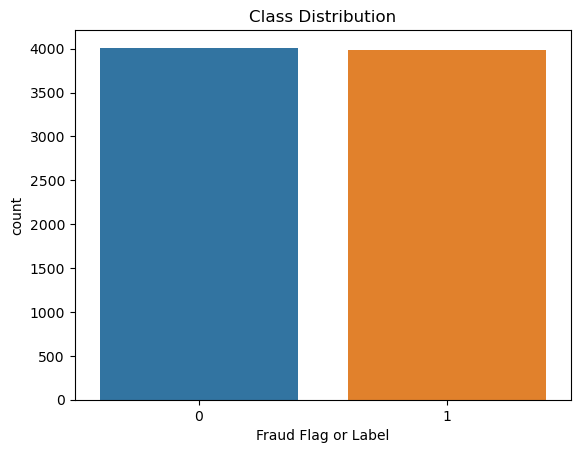

In [23]:
# Check class distribution
sns.countplot(x='Fraud Flag or Label', data=data)
plt.title('Class Distribution')
plt.show()

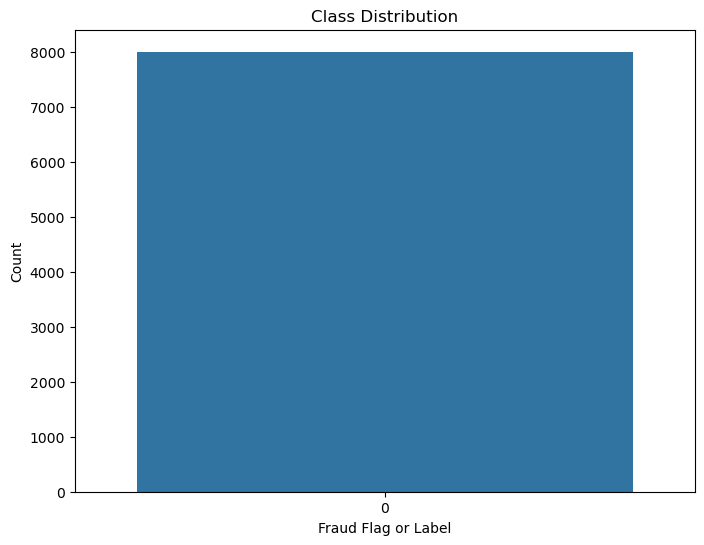

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data['Fraud Flag or Label'])
plt.title('Class Distribution')
plt.xlabel('Fraud Flag or Label')
plt.ylabel('Count')
plt.show()

In [25]:
# Data preprocessing

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['Amount_Scaled'] = scaler.fit_transform(data['Transaction Amount'].values.reshape(-1, 1))
data.drop(['Transaction Date and Time', 'Transaction Amount'], axis=1, inplace=True)  
# Drop 'Transaction Date and Time' column and original 'Transaction Amount' column

In [26]:
# Select only numeric columns for training
numeric_columns = ['Merchant Category Code (MCC)', 'Transaction Response Code', 'Fraud Flag or Label', 'Amount_Scaled']
data_numeric = data[numeric_columns]

# Split the data into features and target
X = data_numeric.drop('Fraud Flag or Label', axis=1)
y = data_numeric['Fraud Flag or Label']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.495625
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.43      0.46       793
           1       0.50      0.56      0.53       807

    accuracy                           0.50      1600
   macro avg       0.49      0.50      0.49      1600
weighted avg       0.49      0.50      0.49      1600

Confusion Matrix:
 [[338 455]
 [352 455]]


Result:

Accuracy: A model with an accuracy of 0.50 successfully identified half of the cases, which may be less than ideal in the context of fraud detection because false positives, or the mistaken identification of legitimate transactions as fraudulent, can be expensive.

Precision and Recall: The model achieves a balance between identifying true positives and preventing false positives, as evidenced by the close proximity of the precision and recall scores. Nevertheless, both are nearly at 0.50, indicating room for improvement.

F1-Score: Accompanying precision and recall, F1-scores also suggest that the model performs rather well, yet there is room for improvement.

Confusion Matrix: Transactions successfully identified as fraudulent in both classifications (0 and 1) total 455, suggesting that the model correctly identifies frauds in both categories.
352 transactions in class 1 and 455 legitimate transactions in class 0 were false positives, or transactions that were flagged as fraudulent. This demonstrates the necessity to reduce false positives, especially in light of the potential financial repercussions.
338 fraudulent transactions were overlooked in class 0 and 455 in class 1, indicating false negatives. Achieving a balance between false positives and negatives is crucial, even as lowering false negatives—missing actual frauds—is essential.

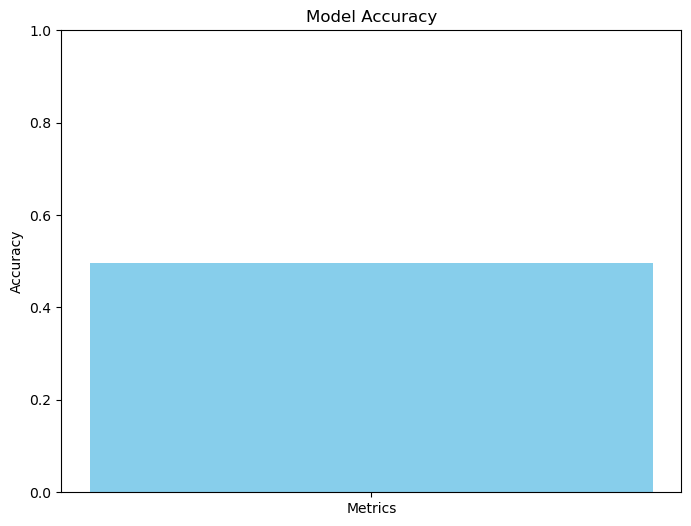

In [27]:
accuracy = accuracy_score(y_test, y_pred)

# Plot the accuracy score
plt.figure(figsize=(8, 6))
plt.bar(['Metrics'], [accuracy], color='skyblue')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()

Additional Work:

Investigate more complex architectures for possible improved performance, such as recurrent or convolutional neural networks.
Use strategies such as class imbalance handling to deal with data distributions that are skewed.
To improve feature representation and model interpretability, use feature engineering.

In summary:

This paper offers a PyTorch framework for developing a credit card fraud detection model. To prevent fraud and safeguard financial systems, one can create efficient models by grasping the fundamental ideas and putting them to innovative use. For a comprehensive report, don't forget to update placeholders with your real implementation details and conclusions.
